# Tarea 7
## Métodos Computacionales (2016-1)

Esta tarea es individual y debe entregarse por Sicua Plus como un único archivo con extensión ".ipynb". Verifique que su notebook pueda ejecutarse en orden.

# La Física
## Luminosidad, magnitud aparente y magnitud relativa
En astronomía hay dos cantidades claves para entender la luminosidad de los objetos en el cielo

+ Por un lado tenemos la magnitud aparente, la cual es una medida de la luminosidad de un objeto que se observa desde la tierra. Solemos denotarla por la letra $m$. Aquí tenemos una lista de las magnitudes aparentes de algunos cuerpos celestes (de Wikipedia):


 | Magnitud aparente ($m$) | Objeto celeste |
 | ----------------------- | -------------- |
 | -26.8 | Sol |
 | -12.6 | Luna llena |
 | -4.4  | Brillo máximo de Venus |
 | -2.9  | Brillo máximo de Júpiter |
 | -2.8  | Brillo máximo de Marte |
 | -1.9  | Brillo máximo de Mercurio |
 | -1.5  | Estrella más brillante: Sirio |
 | -0.67 | Segunda estrella más brillante: Canopus |
 | -0.24 | Brillo máximo de Saturno |
 |  +3.0 | Estrellas débiles que son visibles en una vecindad urbana |
 | +6.0  | Estrellas débiles visibles al ojo humano |
 | +12.6 | Quasar más brillante |
 | +30 	 | Objetos más débiles observables con el Telescopio Espacial Hubble |

+ Por otro lado tenemos la magnitud absoluta, la cual es una medida de la luminosidad de un objeto que se observa a una distancia de 10 Parsecs. Solemos denotarla por la letra $M$.

Note que la magnitud absoluta, como su nombre lo dice, es una medida absoluta de la luminosidad de un cuerpo celeste. Dos objetos con la misma magnitud absoluta emiten la misma cantidad de luz. Mientras que magnitud aparente es una medida relativa, dos objetos pueden tener la misma magnitud aparente y emitir distintas cantidades de luz si uno se encuentra mas lejos de la tierra que otro.

Entonces, una relación entre estas dos magnitudes puede entenderse como la distancia que hay entre un cuerpo celeste y la tierra. Un ejemplo de esto es el módulo de distancia ($\mu$) que definimos como
$$\mu = m-M$$
Otra cantidad relacionada es la distancia de luminosidad ($D_{L}$)
$$D_{L} = 10^{\frac{\mu}{5} + 1}$$

## Cosmología
Para nuestro ejercicio, consideraremos que el universo es plano y que estamos en una etapa del universo donde la radiación inicial del universo se ha desvanecido totalmente. De la ecuación de Hubble podemos derivar la distancia de luminosidad de cualquier objeto si conocemos su corrimiento al rojo, la velocidad de la luz, la constante de Hubble y el parámetro de densidad de materia en el universo  

$$ D_L(z; H_{0},\Omega_{M}) = (1+z)\frac{c}{H_{0}}\int_{0}^{z}\frac{dz}{\sqrt{\Omega_{M}(1+z)^{3} + (1-\Omega_{M})}}$$

Y asi mismo podemos conocer su módulo de distancia

$$\mu(z; H_{0}, \Omega_{M}) = 5\log_{10}(D_{L})-5$$

## Supernovas 1a
Las supernovas 1a son eventos que ocurren en sistemas binarios de estrellas, en la cual una de ellas es una enana blanca. Una supernova 1a ocurre cuando la enana blanca comienza a acretar materia proveniente de su compañera hasta que alcanza cierta masa crítica y explota. Dado que las condiciones de estos eventos son muy similares, todas las supernovas 1a brillan con la misma intensidad y por lo tanto su magnitud absoluta es la misma $M = −19.3$. Dado que desde la tierra podemos medir la magnitud aparente conocemos el módulo de luminosidad y la distancia de luminosidad de estos eventos.

# Los Datos
Supernova Cosmology Project tiene una compilación de las magnitudes aparentes y el corrimiento al rojo de 800 supernovas 1a. Estos datos pueden encontrarlos acá: http://supernova.lbl.gov/union/figures/SCPUnion2.1_mu_vs_z.txt . En cada columna encontrarán: El ID de la supernova, corrimiento al rojo, magnitud aparente y el error de la magnitud aparente. Hay una columna adicional que no es relevante para nuestros propositos.

# Ejercicio

### Punto 1a (20 puntos):
Escriba una función en Python que calcule la distancia de luminosidad $D_L$ y que reciba como parámetros, el redshift $z$, la constante de Hubble $H_{0}$, el parámetro de densidad de materia $\Omega_{M}$ y la velocidad de la luz en el vacío $c$. Dado que la integral no puede hacerse de forma analítica, se recomienda utilizar scipy.integrate.quad. Usted debe familiarizarse con su funcionamiento guiandose por la documentación de Scipy.

### Punto 1b (10 puntos):
Escriba una función en Python que calcule el módulo de distancia $\mu$ y que reciba como parámetros, el redshift $z$, la constante de Hubble $H_{0}$, el parámetro de densidad de materia $\Omega_{M}$ y la velocidad de la luz en el vacío $c$, utilizando la función del punto anterior.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import scipy as sc
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1a

In [2]:
def fun_to_inte(z,DM):
    
    return 1/np.sqrt(DM*(1+z)*(1+z)*(1+z)+(1-DM))

In [3]:
fun_to_inte(10,5)

0.012261864879628494

In [4]:
def Dl(z,Ho,DM,c): # Distancia de luminosidad
    return (1+z)*(c/Ho)*sc.integrate.quad(fun_to_inte,0,z,DM)[0]

In [5]:
Dl(0.2,556,47,30000)

3.8374867732757907

## 1b

In [6]:
def mu(z,Ho,DM,c):# modulo de distancia
    return 5*np.log10(Dl(z,Ho,DM,c))-5

In [7]:
mu(0.197,63,8,9999)

1.6432694173100231

In [8]:
import pandas as pd


### Punto 2a (5 puntos):
Cargue los datos dados por Supernova Cosmology Project como arrays de Numpy, usted debe tener un array para el redshift, otro para la magnitud aparente y otro para la incertidumbre de esta última. Note que no es necesario utilizar Astropy o Pandas para esta tarea, con numpy.loadtxt es suficiente.

### Punto 2b (5 puntos):
Habiendo cargado estos datos, escriba una función en Python que compute el Chi cuadrado como función de $H_{0}$ y $\Omega_{M}$ utilizando el modelo definido en el punto 1 y los datos del punto 2.
$$\chi^{2}(H_0,\Omega_M) = \sum_{i=1}^{n} \frac{(\mu_{teo}(z_i; H_0, \Omega_M) - \mu_i)^2}{\sigma_i^2}$$
Note que $c$ no aparece explícitamente porque asumiremos que conocemos su valor, use el valor oficial de $c$.


In [9]:
datos=pd.read_table('SCPUnion2.1_mu_vs_z.txt')

In [10]:
ide=datos.values[:,0]
rz=datos.values[:,1]
mag_apa=datos.values[:,2]
mag_err=datos.values[:,3]

In [11]:
M=-19.3
mu_dat=mag_apa-M
type(rz)

numpy.ndarray

In [12]:
c=299792458
def chi_quad(Ho,DM,c):
    chi=0
    for i in range(len(rz)):
        chi = chi + ((mu(rz[i],Ho,DM,c)-mu_dat[i])**2)/mag_err[i]**2
    return chi



### Punto 3a (30 puntos):
Implemente desde cero el algoritmo de Metropolis-Hastings en Python para muestrear la verosimilitud
$$\mathcal{L}\propto \exp(-\frac{1}{2}\chi^{2}(H_0,\Omega_M))$$
Solo puede utilizar funciones basicas de python y de numpy dentro del algoritmo.

### Punto 3b (10 puntos):
Calcule la media y los percentiles 16% y 84% para los parámetros (ver numpy.percentiles). Haga un histograma para cada parámetro $H_0$ y $\Omega_M$ usando matplotlib. Incluya en estos histogramas la media y los percentiles de sus parámetros.


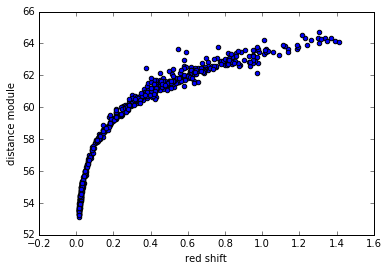

In [13]:
plt.scatter(rz,mu_dat)
plt.ylabel('distance module')
plt.xlabel('red shift')

In [14]:
def likelyhood(y_obs, y_model):
    chi_squared = (1.0/2.0)*sum((y_obs-y_model)**2)
    return exp(-chi_squared)

In [15]:
Ho_walk = empty((0)) #this is an empty list to keep all the steps
Dm_walk = empty((0))
l_walk = empty((0))

Ho_walk = append(Ho_walk,100*random.random())
Dm_walk = append(Dm_walk, random.random())

y_init = []
for j in range (len(mu_dat)):
    y_init.append(mu(rz[j], Ho_walk, Dm_walk,c)[0]) 

chi=0
like=chi_quad(Ho_walk,Dm_walk,c)  
    
l_walk = append(l_walk, like)
print Ho_walk
print Dm_walk
print l_walk


[ 89.8595435]
[ 0.86158803]
[ 23848066.92448977]


In [16]:
n_iterations = 1000 #this is the number of iterations I want to make
for i in range(n_iterations):
    
    Ho_prime = np.random.normal(Ho_walk[i], 0.5) 
    Dm_prime = np.random.normal(Dm_walk[i], 0.5)
#    print Ho_prime
    y_init = []
    y_prime = []
    for j in range (len(mu_dat)):
        y_init.append(mu(rz[j], Ho_walk[i], Dm_walk[i],c))
        y_prime.append(mu(rz[j], Ho_prime, Dm_prime,c))
    l_init=chi_quad(Ho_walk[i],Dm_walk[i],c)#cuando uso la def del likelihood siempre me da 
    l_prime=chi_quad(Ho_prime,Dm_prime,c)    #cero porque chi es muy grande, por lo tanto use
                                            #mi intuicion


    alpha = l_init/l_prime
    if(alpha>=1.0):
        Ho_walk  = append(Ho_walk,Ho_prime)
        Dm_walk  = append(Dm_walk,Dm_prime)
        l_walk = append(l_walk, l_prime)
    else:
        beta = random.random()
        if(beta<=alpha):
            Ho_walk = append(Ho_walk,Ho_prime)
            Dm_walk = append(Dm_walk,Dm_prime)
            l_walk = append(l_walk, l_prime)
        else:
            Ho_walk = append(Ho_walk,Ho_walk[i])
            Dm_walk = append(Dm_walk,Dm_walk[i])
            l_walk = append(l_walk, l_init)


/opt/conda/envs/python2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


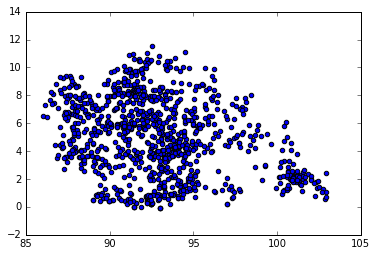

In [17]:
scatter(Ho_walk, Dm_walk)

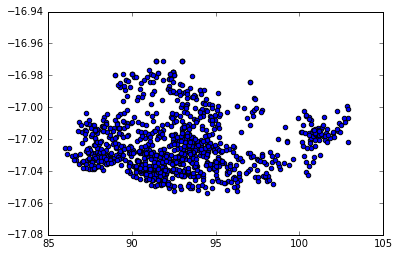

In [18]:
scatter(Ho_walk, -log(l_walk))

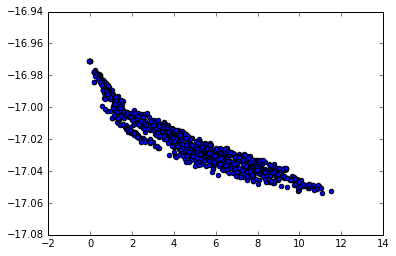

In [19]:
scatter(Dm_walk, -log(l_walk))

In [20]:
min_b = amin(Dm_walk)
max_b = amax(Dm_walk)
min_m = amin(Ho_walk)
max_m = amax(Ho_walk)
grid_m, grid_b = mgrid[min_m:max_m:200j, min_b:max_b:200j]

In [21]:
Ho_mean=np.mean(Ho_walk)
Dm_mean=np.mean(Dm_walk)

In [22]:
Ho_perce16=np.percentile(Ho_walk,16)
Dm_perce16=np.percentile(Dm_walk,16)
Ho_perce84=np.percentile(Ho_walk,84)
Dm_perce84=np.percentile(Dm_walk,84)

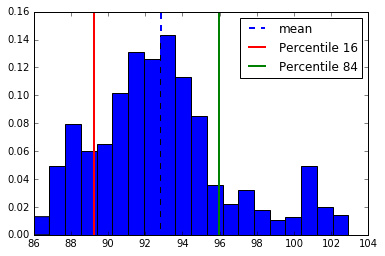

In [36]:
count, bins, ignored =plt.hist(Ho_walk, 20, normed=True)
plt.axvline(Ho_mean, color='b', linestyle='dashed', linewidth=2, label="mean")
plt.axvline(Ho_perce16, color='r', linewidth=2, label="Percentile 16")
plt.axvline(Ho_perce84, color='g', linewidth=2, label="Percentile 84")
plt.legend()

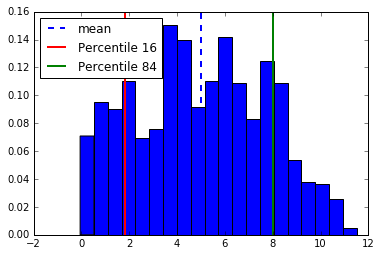

In [40]:
count, bins, ignored =plt.hist(Dm_walk, 20, normed=True)
plt.axvline(Dm_mean, color='b', linestyle='dashed', linewidth=2, label="mean")
plt.axvline(Dm_perce16, color='r', linewidth=2, label="Percentile 16")
plt.axvline(Dm_perce84, color='g', linewidth=2, label="Percentile 84")
plt.legend(loc=0)


In [26]:
max_likelihood_id = argmax(l_walk)
best_m = Ho_walk[max_likelihood_id]
best_b = Dm_walk[max_likelihood_id]
print log10(l_walk[max_likelihood_id])
print best_m
print best_b

7.40634967262
94.4902779977
11.0683808052


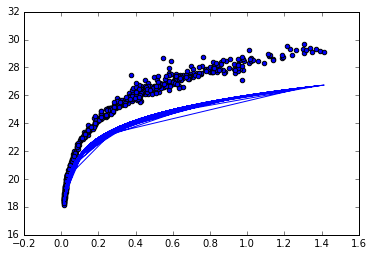

In [32]:
best_y = []
for i in range(len(rz)):
    best_y.append(mu(rz[i], best_m, best_b,c))
scatter(rz,mu_dat-35)
plot(rz, best_y)

### Punto 4a (10 puntos):
Si su caminata aleatoria tiene $N$ pasos, calcule la varianza $\sigma_{n}^{2}$ de la caminata aleatoria desde $n$ hasta $N$ para todos los $n$ desde $2$ hasta $N$. Si su cadena está bien mezclada esta varianza $\sigma_{n}^{2}$ debería disminuir en función de $n$ y estabilizarse. Grafíquela.

### Punto 4b (10 puntos):
Compare sus resultados con los obtenidos por Planck (ver http://arxiv.org/abs/1502.01589 Tabla 3) con los resultados de los puntos 3b, 4a y 4c concluya. Los resultados obtenidos son razonables? la caminata aleatoria se encuentra bien mezclada? etc.

## 4b

En la literatura encontramos para $ \Omega_m$ un valor de 0.308 +/- 0.012, y para $H_o$ un valor de 67.8 +/- 0.9. Los valores que obtuve fueron para $ \Omega_m$ de 11.07 y para $H_o$ de 94.49. Son bastante diferentes, en especial el de $ \Omega_m$, esto puede deberse a que al haber tantos datos, el $\chi^2$ resultaba ser enorme y el likelihood el computador lo aproximaba a cero, para la decicion de camino decidi usar el chi y cambiar la decicion del $\alpha$ por las contrarias, sin embargo parece no haber arrojado buenos resultados. de todas maneras se nota que existe una tendencia ya que para el $H_o$ los valores varian entre 85 y 103 y para el $ \Omega_m$ varian entre cero y 11. Seguramente el codigo debe tener un error en la implementacion y debe ser revisado de nuevo para obtener resultador coherentes.